In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
import pandas_datareader.data as web
from keras.layers import Dense,Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
start_date=datetime(2000, 1, 1)

In [3]:
stock='AAPL'
AAPL_df=web.DataReader(stock,data_source='yahoo',start=start_date)

In [4]:
AAPL_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.786033
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855796
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783644
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.795111
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.726304
...,...,...,...,...,...,...
2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005
2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003
2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007


In [5]:
#1 reset the date indec to column
AAPL_df=AAPL_df.reset_index()

In [6]:
AAPL_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.786033
1,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855796
2,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783644
3,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.795111
4,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.726304
...,...,...,...,...,...,...,...
5614,2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005
5615,2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003
5616,2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007
5617,2022-04-28,164.520004,158.929993,159.250000,163.639999,115586400.0,163.639999


In [7]:
AAPL_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5619.000000,5619.000000,5619.000000,5619.000000,5.619000e+03,5619.000000
mean,26.659974,26.090048,26.373997,26.386264,4.241742e+08,25.287605
std,38.903780,38.025051,38.457409,38.484278,3.885672e+08,38.411072
min,0.235536,0.227143,0.231964,0.234286,2.457435e+07,0.200613
25%,1.599018,1.560714,1.578393,1.577232,1.526734e+08,1.350543
50%,12.133571,11.908571,12.011786,12.005000,3.073980e+08,10.279571
75%,31.727500,31.228750,31.498750,31.471251,5.637338e+08,28.651411
max,182.940002,179.119995,182.630005,182.009995,7.421641e+09,181.778397


In [8]:
AAPL_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.786033
1,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855796
2,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783644
3,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.795111
4,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.726304
...,...,...,...,...,...,...,...
5614,2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005
5615,2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003
5616,2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007
5617,2022-04-28,164.520004,158.929993,159.250000,163.639999,115586400.0,163.639999


In [9]:
# 2 .Drop null values
AAPL_df.dropna(inplace = True)

In [10]:
AAPL_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5619.000000,5619.000000,5619.000000,5619.000000,5.619000e+03,5619.000000
mean,26.659974,26.090048,26.373997,26.386264,4.241742e+08,25.287605
std,38.903780,38.025051,38.457409,38.484278,3.885672e+08,38.411072
min,0.235536,0.227143,0.231964,0.234286,2.457435e+07,0.200613
25%,1.599018,1.560714,1.578393,1.577232,1.526734e+08,1.350543
50%,12.133571,11.908571,12.011786,12.005000,3.073980e+08,10.279571
75%,31.727500,31.228750,31.498750,31.471251,5.637338e+08,28.651411
max,182.940002,179.119995,182.630005,182.009995,7.421641e+09,181.778397


In [11]:
#3.sort the datavalues by date
AAPL_df.sort_values(by = 'Date', ignore_index = True)

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.786033
1,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855796
2,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783644
3,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.795111
4,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.726304
...,...,...,...,...,...,...,...
5614,2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005
5615,2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003
5616,2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007
5617,2022-04-28,164.520004,158.929993,159.250000,163.639999,115586400.0,163.639999


In [12]:
AAPL_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.786033
1,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855796
2,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783644
3,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.795111
4,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.726304
...,...,...,...,...,...,...,...
5614,2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005
5615,2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003
5616,2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007
5617,2022-04-28,164.520004,158.929993,159.250000,163.639999,115586400.0,163.639999


In [13]:
#4 Drop rows having Date < '2015-01-01'
AAPL_df=AAPL_df[AAPL_df['Date']>='2015-01-01'].reset_index(drop=True)

In [14]:
AAPL_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1845.000000,1845.000000,1845.000000,1845.000000,1.845000e+03,1845.000000
mean,66.805573,65.387061,66.084079,66.127668,1.359387e+08,64.649189
std,45.694424,44.572022,45.128471,45.158264,6.903579e+07,45.761764
min,22.917500,22.367500,22.500000,22.584999,2.457435e+07,21.009535
25%,31.997499,31.497499,31.780001,31.730000,8.911160e+07,28.851423
50%,45.875000,45.052502,45.647499,45.430000,1.163079e+08,44.038033
75%,92.617500,90.567497,91.250000,91.209999,1.623012e+08,90.217209
max,182.940002,179.119995,182.630005,182.009995,6.488252e+08,181.778397


In [15]:
#5 Change Dtype of Columns
AAPL_df['Date']=pd.to_datetime(AAPL_df["Date"])
    
for col in ["Open","High","Low","Close","Adj Close","Volume"]:
    AAPL_df[col]=AAPL_df[col].astype(str).str.replace(',','')

In [16]:
AAPL_df=AAPL_df.astype({"Open":float,"High":float,"Low":float,"Close":float,"Adj Close":float,"Volume":float})

In [17]:
AAPL_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.714508
1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.018261
2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.020519
3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.357346
4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.293207
...,...,...,...,...,...,...,...
1840,2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005
1841,2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003
1842,2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007
1843,2022-04-28,164.520004,158.929993,159.250000,163.639999,115586400.0,163.639999


In [18]:
stock='TSLA'
TSLA_df=web.DataReader(stock,data_source='yahoo',start=start_date)

In [19]:
stock='AMZN'
AMZN_df=web.DataReader(stock,data_source='yahoo',start=start_date)

In [20]:
stock='GOOG'
GOOG_df=web.DataReader(stock,data_source='yahoo',start=start_date)

In [21]:
stock='MSFT'
MSFT_df=web.DataReader(stock,data_source='yahoo',start=start_date)

In [22]:
#1 reset the date indec to column
MSFT_df=AAPL_df.reset_index()
TSLA_df=TSLA_df.reset_index()
GOOG_df=GOOG_df.reset_index()
AMZN_df=MSFT_df.reset_index()

In [23]:
# 2 .Drop null values
MSFT_df.dropna(inplace=True)
TSLA_df.dropna(inplace=True)
GOOG_df.dropna(inplace=True)
AMZN_df.dropna(inplace=True)

In [24]:
#3.sort the datavalues by date
MSFT_df.sort_values(by = 'Date', ignore_index = True)
TSLA_df.sort_values(by = 'Date', ignore_index = True)
GOOG_df.sort_values(by = 'Date', ignore_index = True)
AMZN_df.sort_values(by = 'Date', ignore_index = True)

,level_0,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.714508
1,1,1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.018261
2,2,2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.020519
3,3,3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.357346
4,4,4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.293207
...,...,...,...,...,...,...,...,...,...
1840,1840,1840,2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005
1841,1841,1841,2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003
1842,1842,1842,2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007
1843,1843,1843,2022-04-28,164.520004,158.929993,159.250000,163.639999,115586400.0,163.639999


In [25]:
#4 Drop rows having Date < '2015-01-01'
MSFT_df=AAPL_df[AAPL_df['Date']>='2015-01-01'].reset_index(drop=True)
TSLA_df=AAPL_df[AAPL_df['Date']>='2015-01-01'].reset_index(drop=True)
GOOG_df=AAPL_df[AAPL_df['Date']>='2015-01-01'].reset_index(drop=True)
AMZN_df=AAPL_df[AAPL_df['Date']>='2015-01-01'].reset_index(drop=True)

In [26]:
#5 Change Dtype of Columns MSFT_df
MSFT_df['Date']=pd.to_datetime(MSFT_df["Date"])
    
for col in ["Open","High","Low","Close","Adj Close","Volume"]:
    MSFT_df[col]=MSFT_df[col].astype(str).str.replace(',','')

MSFT_df=MSFT_df.astype({"Open":float,"High":float,"Low":float,"Close":float,"Adj Close":float,"Volume":float})

In [27]:
# Change Dtype of Columns TSLA_df
TSLA_df['Date']=pd.to_datetime(TSLA_df["Date"])
    
for col in ["Open","High","Low","Close","Adj Close","Volume"]:
    TSLA_df[col]=TSLA_df[col].astype(str).str.replace(',','')

TSLA_df=TSLA_df.astype({"Open":float,"High":float,"Low":float,"Close":float,"Adj Close":float,"Volume":float})

In [28]:
# Change Dtype of Columns AMZN_df
AMZN_df['Date']=pd.to_datetime(AMZN_df["Date"])
    
for col in ["Open","High","Low","Close","Adj Close","Volume"]:
    AMZN_df[col]=AMZN_df[col].astype(str).str.replace(',','')

AMZN_df=AMZN_df.astype({"Open":float,"High":float,"Low":float,"Close":float,"Adj Close":float,"Volume":float})

In [29]:
# Change Dtype of Columns GOOG_df
GOOG_df['Date']=pd.to_datetime(GOOG_df["Date"])
    
for col in ["Open","High","Low","Close","Adj Close","Volume"]:
    GOOG_df[col]=GOOG_df[col].astype(str).str.replace(',','')

GOOG_df=GOOG_df.astype({"Open":float,"High":float,"Low":float,"Close":float,"Adj Close":float,"Volume":float})

# Exploratory Data Analysis

In [30]:
Companies=[AAPL_df,MSFT_df,TSLA_df,AMZN_df,GOOG_df]
Companies_Title=["Apple","Microsoft","Tesla","Amazon","Google"]

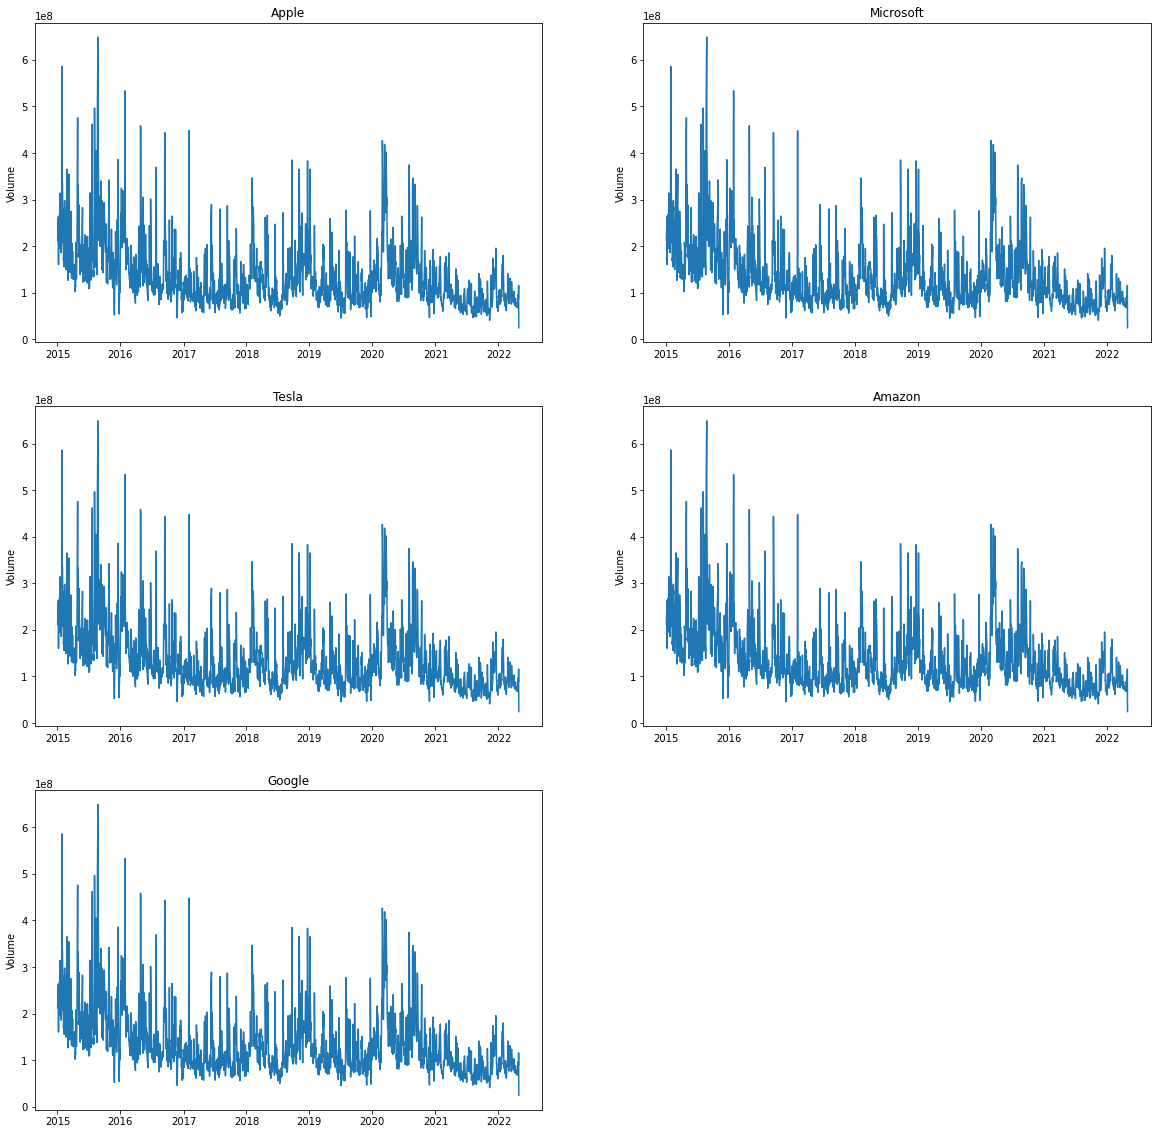

In [31]:
#6 Now lets plot the total volume of stock being traded each day
plt.figure(figsize=(20,20))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company["Date"],company["Volume"])
    plt.title(Companies_Title[index])
    plt.ylabel('Volume')

### What was the moving average of the various stocks ?

In [32]:
#7 calculate Moving Average
Moving_Average_Day=[10,20,50]

for Moving_Average in Moving_Average_Day:
    for company in Companies:
        column_name=f'Moving Average for {Moving_Average} days'
        company[column_name]=company['Adj Close'].rolling(Moving_Average).mean()

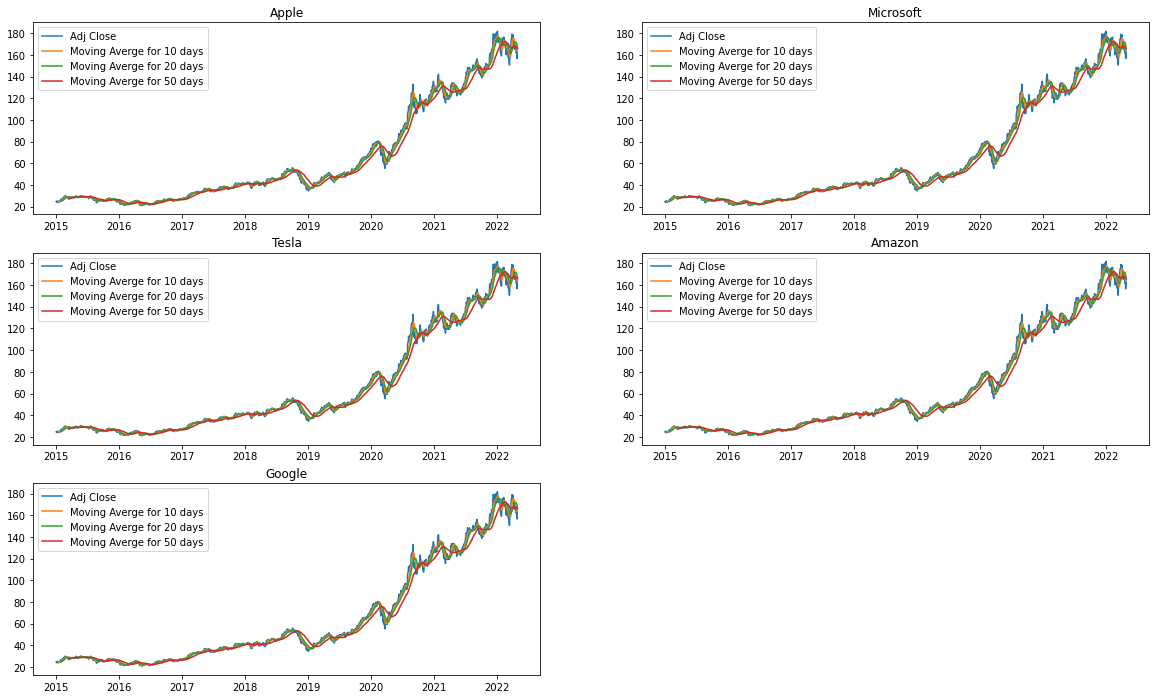

In [33]:
plt.figure(figsize=(20,12))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company["Date"], company["Adj Close"])
    plt.plot(company["Date"], company["Moving Average for 10 days"])
    plt.plot(company["Date"], company["Moving Average for 20 days"])
    plt.plot(company["Date"], company["Moving Average for 50 days"])
    plt.title(Companies_Title[index])
    plt.legend(("Adj Close","Moving Averge for 10 days","Moving Averge for 20 days","Moving Averge for 50 days"))

In [34]:
Moving_Average_Day2=[100,200,500]

for Moving_Average in Moving_Average_Day2:
    for company in Companies:
        column_name=f'Moving Average for {Moving_Average} days'
        company[column_name]=company['Adj Close'].rolling(Moving_Average).mean()

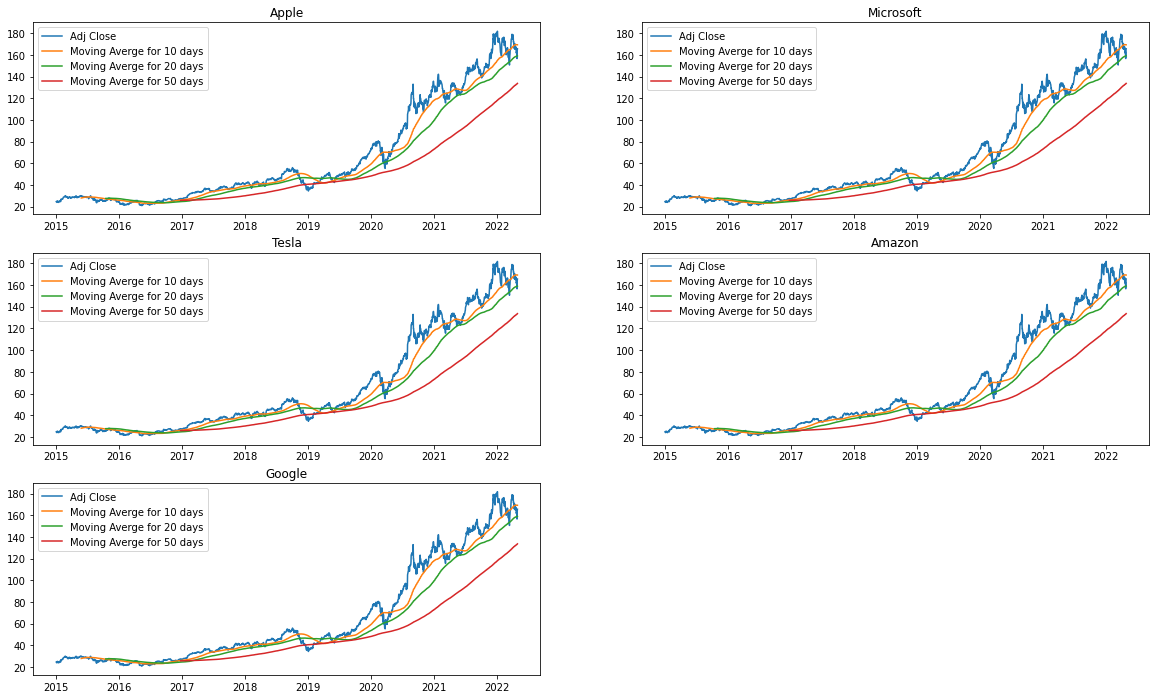

In [35]:
plt.figure(figsize=(20,12))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company["Date"], company["Adj Close"])
    plt.plot(company["Date"], company["Moving Average for 100 days"])
    plt.plot(company["Date"], company["Moving Average for 200 days"])
    plt.plot(company["Date"], company["Moving Average for 500 days"])
    plt.title(Companies_Title[index])
    plt.legend(("Adj Close","Moving Averge for 10 days","Moving Averge for 20 days","Moving Averge for 50 days"))

In [36]:
ma10=AAPL_df.Close.rolling(10).mean()

In [37]:
ma10

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1840    165.988998
1841    165.093999
1842    163.984999
1843    163.309000
1844    163.342801
Name: Close, Length: 1845, dtype: float64

In [38]:
ma20=AAPL_df.Close.rolling(20).mean()
ma20

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1840    170.435000
1841    169.495000
1842    168.375500
1843    167.668999
1844    167.219900
Name: Close, Length: 1845, dtype: float64

In [39]:
ma50=AAPL_df.Close.rolling(50).mean()
ma50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1840    166.800800
1841    166.564001
1842    166.317801
1843    166.134801
1844    165.996361
Name: Close, Length: 1845, dtype: float64

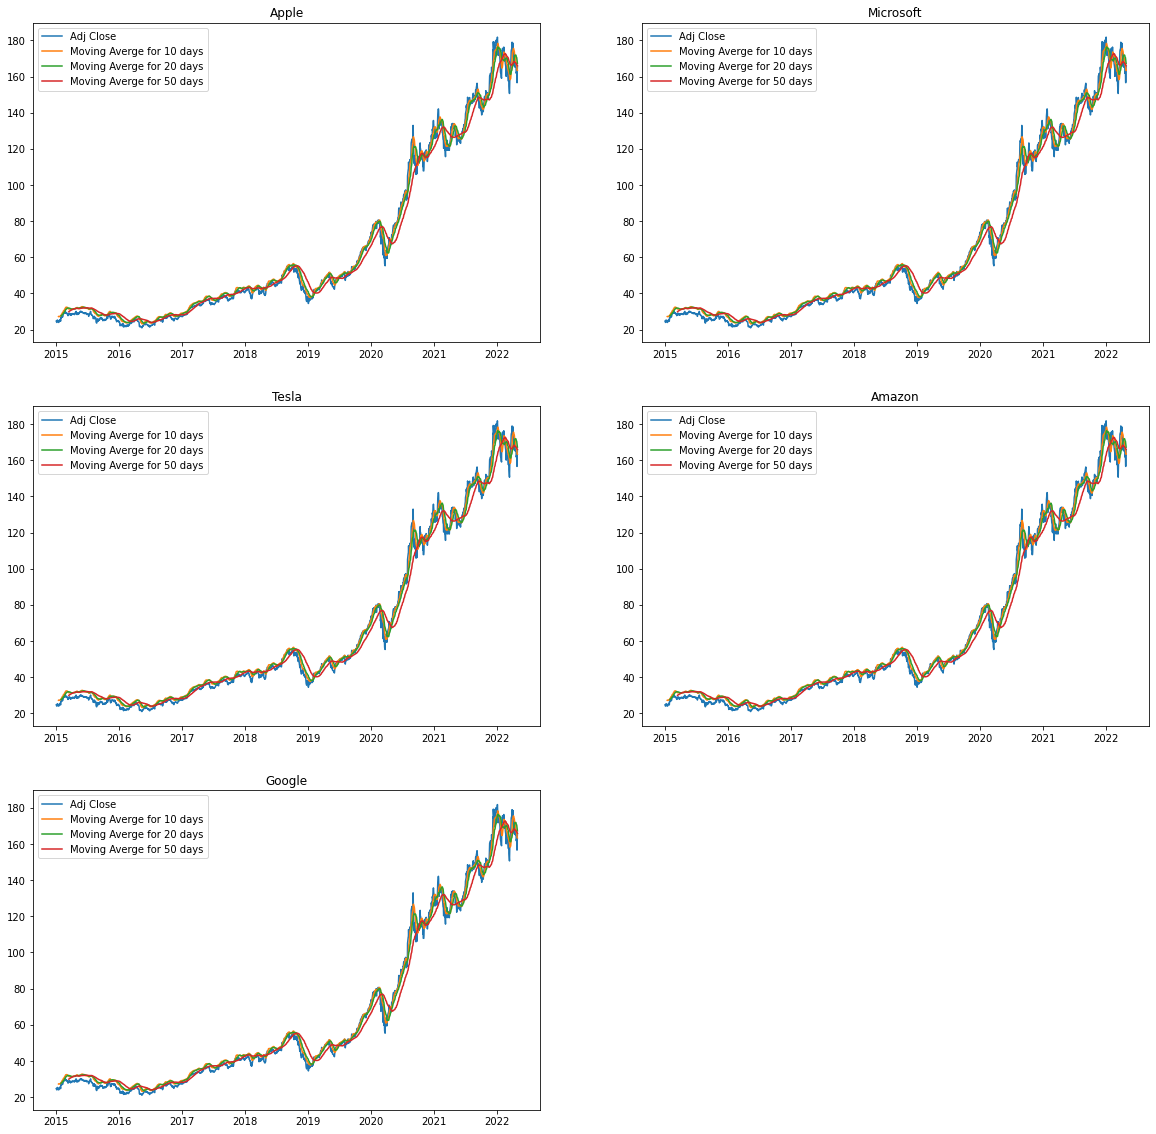

In [40]:
plt.figure(figsize=(20,20))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company["Date"], company["Adj Close"])
    plt.plot(company["Date"], ma10)
    plt.plot(company["Date"], ma20)
    plt.plot(company["Date"], ma50)
    plt.title(Companies_Title[index])
    plt.legend(("Adj Close","Moving Averge for 10 days","Moving Averge for 20 days","Moving Averge for 50 days"))

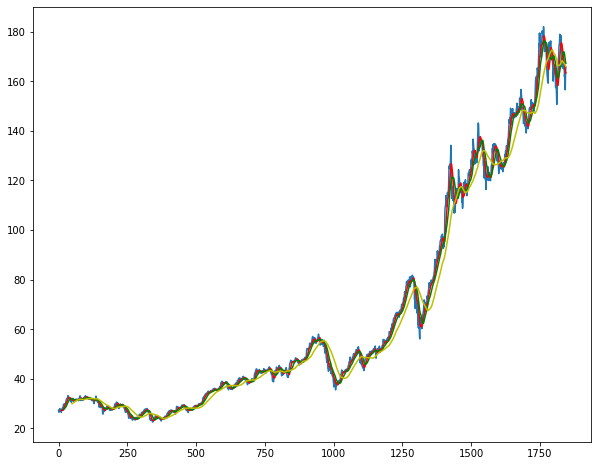

In [41]:
plt.figure(figsize=(10,8))
plt.plot(AAPL_df.Close)
plt.plot(ma10,'r')
plt.plot(ma20,'g')
plt.plot(ma50,'y')

In [42]:
ma100=AAPL_df.Close.rolling(100).mean()
ma200=AAPL_df.Close.rolling(200).mean()
ma500=AAPL_df.Close.rolling(500).mean()

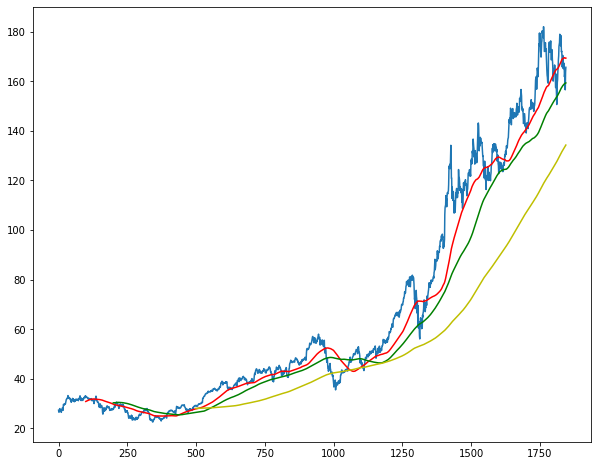

In [43]:
plt.figure(figsize=(10,8))
plt.plot(AAPL_df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.plot(ma500,'y')

In [44]:
AAPL_df

,Date,High,Low,Open,Close,Volume,Adj Close,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Moving Average for 100 days,Moving Average for 200 days,Moving Average for 500 days
0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.714508,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.018261,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.020519,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.357346,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.293207,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005,165.988998,170.435000,166.800800,169.362129,158.808283,132.953270
1841,2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003,165.093999,169.495000,166.564001,169.284526,158.872832,133.124294
1842,2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007,163.984999,168.375500,166.317801,169.214710,158.930555,133.292841
1843,2022-04-28,164.520004,158.929993,159.250000,163.639999,115586400.0,163.639999,163.309000,167.668999,166.134801,169.234769,159.006152,133.473358


### What was the daily return of the stock on average ?

In [45]:
# 8. daily return
for company in Companies:
    company["Daily Return"]=company["Adj Close"].pct_change()

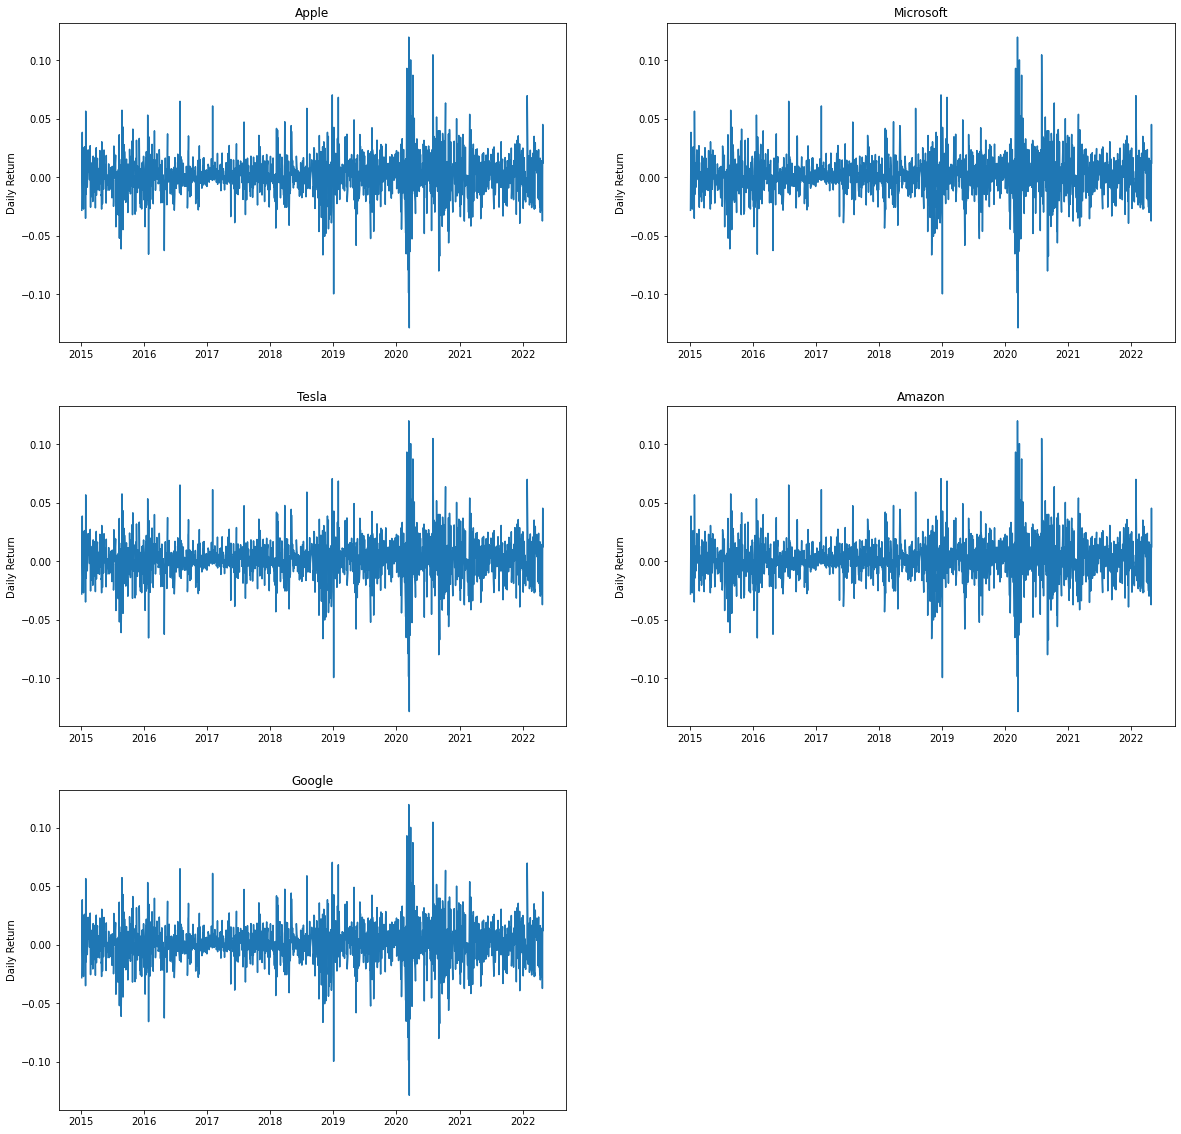

In [46]:
plt.figure(figsize=(20,20))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index + 1)
    plt.plot(company["Date"],company["Daily Return"])
    plt.title(Companies_Title[index])
    plt.ylabel("Daily Return")

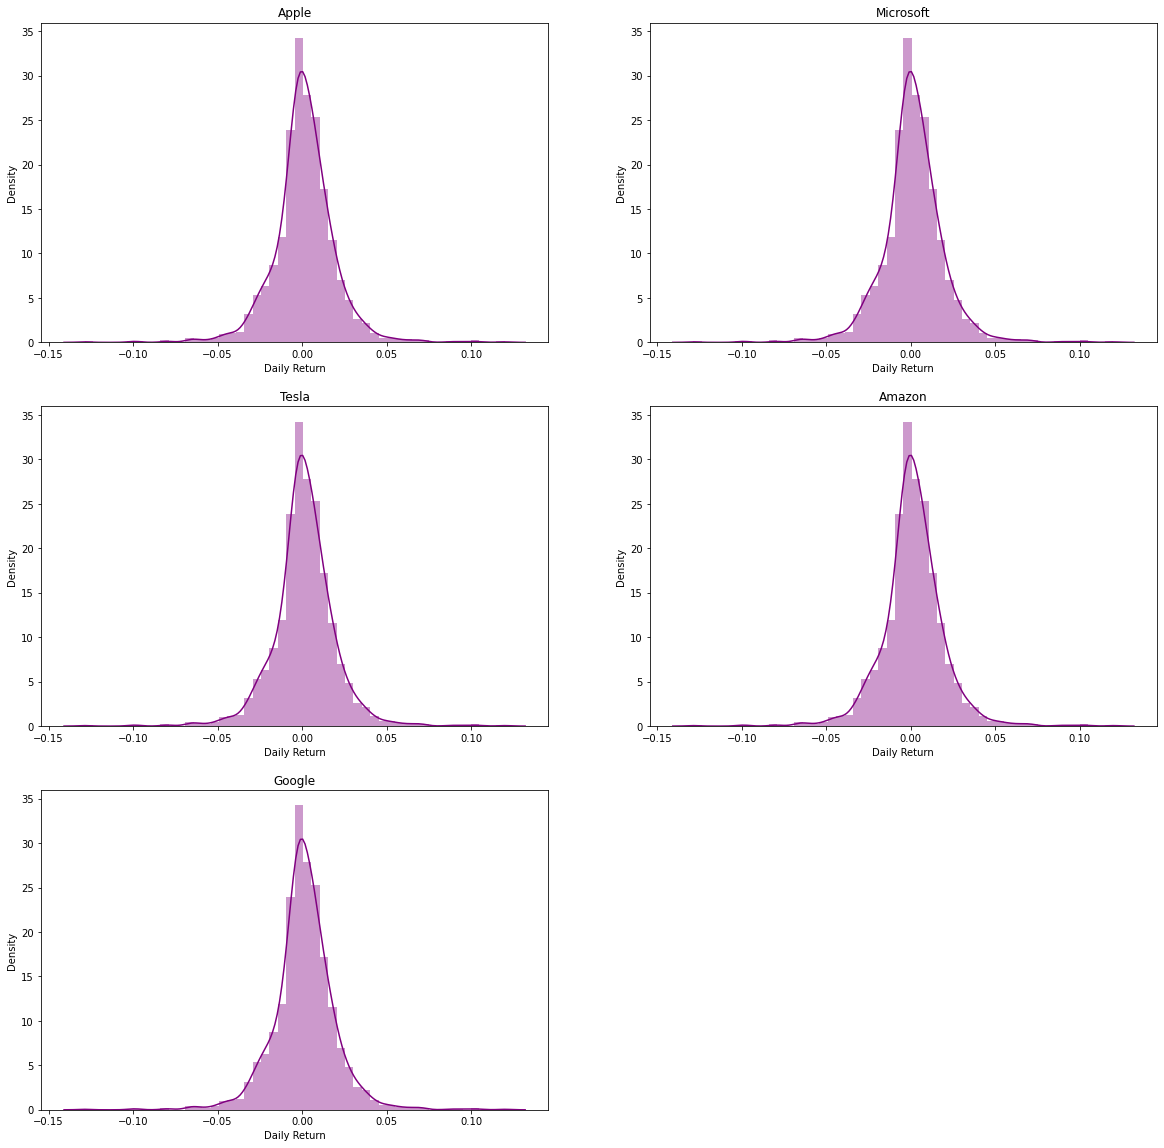

In [47]:
# distplot is a deprecated function, so to ignore warnings, the filterwarnings function is used.
# 9. get an overall at the average daily return using a histogram
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 20))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  sns.distplot(company["Daily Return"].dropna(), color = "purple")
  plt.title(Companies_Title[index])

In [48]:
#10 find kurtosis value
print("Kurtosis value")
for index,company in enumerate(Companies):
    print(f'{Companies_Title[index]}: {company["Daily Return"].kurtosis()}')

Kurtosis value
Apple: 5.908248872965519
Microsoft: 5.908248872965519
Tesla: 5.908248872965519
Amazon: 5.908248872965519
Google: 5.908248872965519


In [49]:
# 11 find out correlation between stocks closing price

Companies_returns=pd.DataFrame()
Companies_returns["AAPL"]=AAPL_df["Adj Close"]
Companies_returns["TSLA"]=TSLA_df["Adj Close"]
Companies_returns["GOOG"]=GOOG_df["Adj Close"]
Companies_returns["MSFT"]=MSFT_df["Adj Close"]
Companies_returns["AMZN"]=AMZN_df["Adj Close"]
Companies_returns.head()

,AAPL,TSLA,GOOG,MSFT,AMZN
0,24.714508,24.714508,24.714508,24.714508,24.714508
1,24.018261,24.018261,24.018261,24.018261,24.018261
2,24.020519,24.020519,24.020519,24.020519,24.020519
3,24.357346,24.357346,24.357346,24.357346,24.357346
4,25.293207,25.293207,25.293207,25.293207,25.293207


In [50]:
#12 Companies_Daily_returns contains percentage daily returns of all the companies
Companies_Daily_returns = Companies_returns.pct_change()
Companies_Daily_returns.head()

,AAPL,TSLA,GOOG,MSFT,AMZN
0,NaN,NaN,NaN,NaN,NaN
1,-0.028172,-0.028172,-0.028172,-0.028172,-0.028172
2,0.000094,0.000094,0.000094,0.000094,0.000094
3,0.014022,0.014022,0.014022,0.014022,0.014022
4,0.038422,0.038422,0.038422,0.038422,0.038422


<AxesSubplot:>

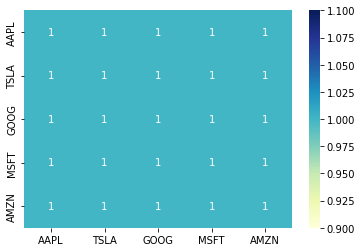

In [51]:
sns.heatmap(Companies_returns.corr(),annot=True,cmap="YlGnBu")

In [52]:
Companies_returns.corr()

,AAPL,TSLA,GOOG,MSFT,AMZN
AAPL,1.0,1.0,1.0,1.0,1.0
TSLA,1.0,1.0,1.0,1.0,1.0
GOOG,1.0,1.0,1.0,1.0,1.0
MSFT,1.0,1.0,1.0,1.0,1.0
AMZN,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:>

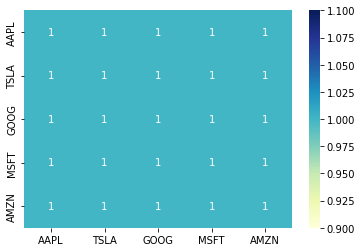

In [53]:
sns.heatmap(Companies_Daily_returns.corr(),annot=True,cmap="YlGnBu")

In [54]:
Companies_Daily_returns.corr()

,AAPL,TSLA,GOOG,MSFT,AMZN
AAPL,1.0,1.0,1.0,1.0,1.0
TSLA,1.0,1.0,1.0,1.0,1.0
GOOG,1.0,1.0,1.0,1.0,1.0
MSFT,1.0,1.0,1.0,1.0,1.0
AMZN,1.0,1.0,1.0,1.0,1.0


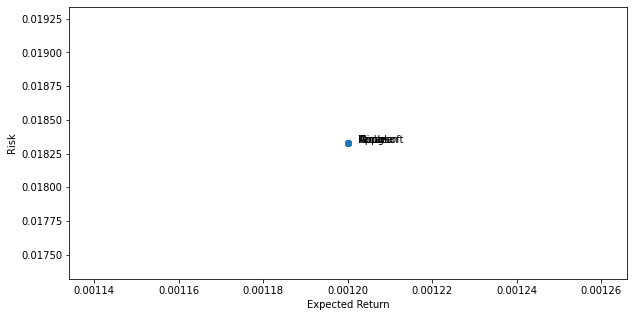

In [55]:
Return=Companies_Daily_returns.dropna()

plt.figure(figsize=(10,5))
plt.scatter(Return.mean(),Return.std())
plt.xlabel('Expected Return')
plt.ylabel("Risk")

for label,x,y in zip(Companies_Title,Return.mean(),Return.std()):
    plt.annotate(label,xy=(x,y),xytext=(10,0),textcoords='offset points')

In [56]:
# !pip install pmdarima

In [57]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [58]:
# !pip install pyramid

In [59]:
# !pip install pmdarima

In [60]:
#!pip install pmdarima

In [61]:
#!pip install pyramid-arima

In [62]:
# !pip install pmdarima

In [63]:
import  scipy.signal.signaltools

In [64]:
def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [65]:
from pmdarima.arima import auto_arima


In [66]:
#Arima model

In [67]:
def Test_Stationarity(timeseries):
    resullt=adfuller(timeseries['Adj Close'],autolag="AIC")
    print("Results of Dickey Fuller Test")
    print(f'Test Statistics: {resullt[0]}')
    print(f'p-value: {resullt[1]}')
    print(f'Number of lags used: {resullt[2]}')
    print(f'Number of observations used: {resullt[3]}')
    
    for key,value in resullt[4].items():
        print(f'critical value ({key}): {value}')

In [68]:
AAPL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1845 non-null   datetime64[ns]
 1   High                         1845 non-null   float64       
 2   Low                          1845 non-null   float64       
 3   Open                         1845 non-null   float64       
 4   Close                        1845 non-null   float64       
 5   Volume                       1845 non-null   float64       
 6   Adj Close                    1845 non-null   float64       
 7   Moving Average for 10 days   1836 non-null   float64       
 8   Moving Average for 20 days   1826 non-null   float64       
 9   Moving Average for 50 days   1796 non-null   float64       
 10  Moving Average for 100 days  1746 non-null   float64       
 11  Moving Average for 200 days  1646 non-null 

In [69]:
AAPL_df["Date"]=pd.to_datetime(AAPL_df["Date"])

In [70]:
Test_Stationarity(AAPL_df)

Results of Dickey Fuller Test
Test Statistics: 1.0468509963118553
p-value: 0.9947364890119702
Number of lags used: 20
Number of observations used: 1824
critical value (1%): -3.433940201056092
critical value (5%): -2.8631258735235106
critical value (10%): -2.5676142653629


Now let's take log of the 'Adj. Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

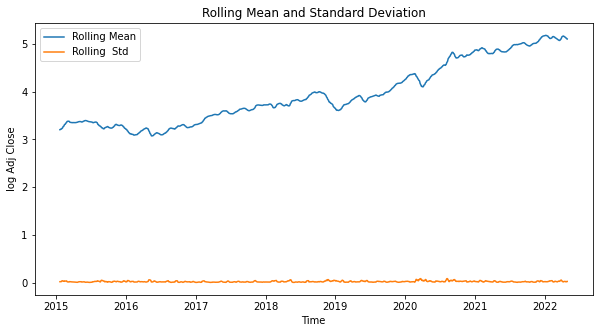

In [71]:
AAPL_df['log Adj Close']=np.log(AAPL_df['Adj Close'])
AAPL_log_moving_avg=AAPL_df['log Adj Close'].rolling(12).mean()
AAPL_log_std=AAPL_df['log Adj Close'].rolling(12).std()

plt.figure(figsize=(10,5))
plt.plot(AAPL_df['Date'],AAPL_log_moving_avg,label='Rolling Mean')
plt.plot(AAPL_df['Date'],AAPL_log_std,label='Rolling  Std')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')

### Split the data into training and test set

    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [72]:
AAPL_Train_Data=AAPL_df[AAPL_df['Date'] < '2020-10-01']
AAPL_Test_Data=AAPL_df[AAPL_df['Date']>= '2020-10-01'].reset_index(drop=True)

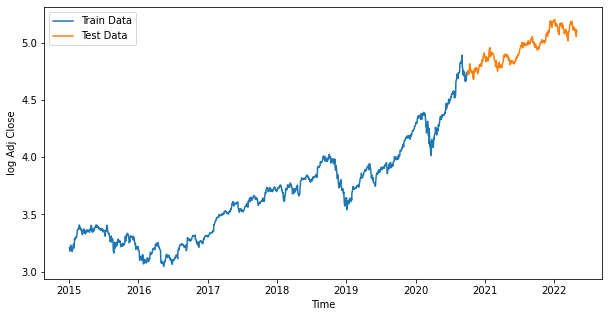

In [73]:
plt.figure(figsize=(10,5))
plt.plot(AAPL_Train_Data['Date'],AAPL_Train_Data['log Adj Close'],label='Train Data')
plt.plot(AAPL_Test_Data['Date'],AAPL_Test_Data['log Adj Close'],label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

In [74]:
AAPL_Train_Data

,Date,High,Low,Open,Close,Volume,Adj Close,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Moving Average for 100 days,Moving Average for 200 days,Moving Average for 500 days,Daily Return,log Adj Close
0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.714508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.207390
1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.018261,NaN,NaN,NaN,NaN,NaN,NaN,-0.028172,3.178814
2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.020519,NaN,NaN,NaN,NaN,NaN,NaN,0.000094,3.178908
3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.357346,NaN,NaN,NaN,NaN,NaN,NaN,0.014022,3.192833
4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.293207,NaN,NaN,NaN,NaN,NaN,NaN,0.038422,3.230536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,2020-09-24,110.250000,105.000000,105.169998,108.220001,167743300.0,107.235069,109.934273,115.902827,110.532769,97.320221,84.086383,63.140288,0.010269,4.675023
1443,2020-09-25,112.440002,107.669998,108.430000,112.279999,149981400.0,111.258118,109.962019,115.272120,110.848493,97.698986,84.312407,63.253018,0.037516,4.711853
1444,2020-09-28,115.320000,112.779999,115.010002,114.959999,137672400.0,113.913734,109.922383,114.784227,111.221188,98.096736,84.548891,63.370084,0.023869,4.735441
1445,2020-09-29,115.309998,113.570000,114.550003,114.089996,99382200.0,113.051636,109.778703,114.043531,111.536482,98.478195,84.780216,63.484077,-0.007568,4.727845


In [75]:
AAPL_Test_Data

,Date,High,Low,Open,Close,Volume,Adj Close,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Moving Average for 100 days,Moving Average for 200 days,Moving Average for 500 days,Daily Return,log Adj Close
0,2020-10-01,117.720001,115.830002,117.639999,116.790001,116120400.0,115.727081,110.782484,112.409539,112.302985,99.237187,85.249893,63.726553,0.008462,4.751235
1,2020-10-02,115.370003,112.220001,112.889999,113.019997,144712000.0,111.991371,111.394860,112.020116,112.706124,99.587049,85.464908,63.842436,-0.032280,4.718422
2,2020-10-05,116.650002,113.550003,113.910004,116.500000,106243800.0,115.439713,112.031017,111.799146,113.182780,99.980693,85.697988,63.963718,0.030791,4.748748
3,2020-10-06,116.120003,112.250000,115.699997,113.160004,161498200.0,112.130112,112.164789,111.815991,113.549821,100.336567,85.914175,64.083458,-0.028670,4.719660
4,2020-10-07,115.550003,114.129997,114.620003,115.080002,96849000.0,114.032639,112.953545,111.705011,113.985724,100.715992,86.140589,64.207925,0.016967,4.736485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005,165.988998,170.435000,166.800800,169.362129,158.808283,132.953270,0.006737,5.093014
394,2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003,165.093999,169.495000,166.564001,169.284526,158.872832,133.124294,-0.037328,5.054971
395,2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007,163.984999,168.375500,166.317801,169.214710,158.930555,133.292841,-0.001467,5.053503
396,2022-04-28,164.520004,158.929993,159.250000,163.639999,115586400.0,163.639999,163.309000,167.668999,166.134801,169.234769,159.006152,133.473358,0.045155,5.097669


In [76]:
data_training=pd.DataFrame(AAPL_df['Close'][0:int(len(AAPL_df)*0.70)])
data_testing=pd.DataFrame(AAPL_df['Close'][int(len(AAPL_df)*0.70):int(len(AAPL_df))])

In [77]:
data_testing

,Close
1291,80.074997
1292,78.262497
1293,74.544998
1294,72.019997
1295,73.162498
...,...
1840,162.880005
1841,156.800003
1842,156.570007
1843,163.639999


In [78]:
data_training

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500
...,...
1286,81.800003
1287,81.217499
1288,81.237503
1289,79.750000


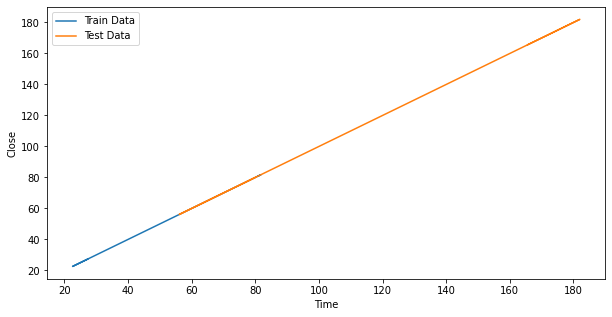

In [79]:
plt.figure(figsize=(10,5))
plt.plot(data_training['Close'],data_training['Close'],label='Train Data')
plt.plot(data_testing['Close'],data_testing['Close'],label='Test Data')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend(loc='best')

### Arima Model

In [80]:
AAPL_Auto_Arima_Model_Adj_Close=auto_arima(AAPL_Train_Data['log Adj Close'],seasonal=False
                                ,error_action='ignore' ,suppress_warnings=True)
print(AAPL_Auto_Arima_Model_Adj_Close.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3721.210
Date:                Fri, 29 Apr 2022   AIC                          -7436.421
Time:                        19:29:26   BIC                          -7420.591
Sample:                             0   HQIC                         -7430.513
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      2.365      0.018       0.000       0.002
ar.L1         -0.0982      0.015     -6.541      0.000      -0.128      -0.069
sigma2         0.0003   6.51e-06     52.291      0.0

In [81]:
AAPL_Auto_Arima_Model_Close=auto_arima(data_training['Close'],seasonal=False
                                ,error_action='ignore' ,suppress_warnings=True)
print(AAPL_Auto_Arima_Model_Close.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1291
Model:               SARIMAX(4, 2, 3)   Log Likelihood               -1255.694
Date:                Fri, 29 Apr 2022   AIC                           2527.388
Time:                        19:29:51   BIC                           2568.681
Sample:                             0   HQIC                          2542.887
                               - 1291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6638      0.045    -36.965      0.000      -1.752      -1.576
ar.L2         -0.9901      0.056    -17.650      0.000      -1.100      -0.880
ar.L3         -0.2200      0.040     -5.444      0.0

In [82]:
AAPL_Arima_Model_Adj_Close=ARIMA(AAPL_Train_Data['log Adj Close'],order=(1,1,0))
AAPL_Arima_Model_Adj_Close_Fit=AAPL_Arima_Model_Adj_Close.fit()
print(AAPL_Arima_Model_Adj_Close_Fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.log Adj Close   No. Observations:                 1446
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3721.210
Method:                       css-mle   S.D. of innovations              0.018
Date:                Fri, 29 Apr 2022   AIC                          -7436.421
Time:                        19:29:51   BIC                          -7420.591
Sample:                             1   HQIC                         -7430.513
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0011      0.000      2.405      0.016       0.000       0.002
ar.L1.D.log Adj Close    -0.0983      0.026     -3.755      0.000      -0.150      -0.047
        

In [83]:
AAPL_Arima_Model_Close=ARIMA(data_training['Close'],order=(1,1,0))
AAPL_Arima_Model_Close_Fit=AAPL_Arima_Model_Close.fit()
print(AAPL_Arima_Model_Close_Fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1290
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1270.882
Method:                       css-mle   S.D. of innovations              0.648
Date:                Fri, 29 Apr 2022   AIC                           2547.764
Time:                        19:29:51   BIC                           2563.251
Sample:                             1   HQIC                          2553.577
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0415      0.018      2.303      0.021       0.006       0.077
ar.L1.D.Close    -0.0007      0.028     -0.025      0.980      -0.055       0.054
                                    Root

### Predicting the closing stock price of Apple

In [84]:
# AAPL_output=AAPL_Arima_Model_Adj_Close_Fit.forecast(102,alpha=0.05)
# AAPL_predictions=np.exp(AAPL_output[0])

# plt.figure(figsize=(10,5))

# plt.plot(AAPL_Train_Data['Date'],AAPL_Train_Data['Adj Close'],label='Training')
# plt.plot(AAPL_Test_Data['Date'],AAPL_Test_Data['Adj Close'],label='Testing')
# plt.plot(AAPL_Test_Data['Date'],AAPL_predictions, label='Predictions')
# plt.plot('Time')
# plt.plot('Closing Price')
# plt.legend()


In [85]:
AAPL_output = AAPL_Arima_Model_Adj_Close_Fit.forecast(102, alpha=0.05)
AAPL_predictions = np.exp(AAPL_output[0])


In [86]:
AAPL_predictions

array([114.7210796 , 114.85851046, 114.97912778, 115.10154307,
       115.22392416, 115.34645156, 115.46910766, 115.59189435,
       115.7148116 , 115.83785955, 115.96103834, 116.08434812,
       116.20778903, 116.3313612 , 116.45506477, 116.57889989,
       116.70286669, 116.82696531, 116.95119589, 117.07555858,
       117.20005351, 117.32468083, 117.44944067, 117.57433318,
       117.69935849, 117.82451675, 117.94980811, 118.07523269,
       118.20079065, 118.32648212, 118.45230725, 118.57826618,
       118.70435905, 118.830586  , 118.95694718, 119.08344273,
       119.21007279, 119.33683751, 119.46373702, 119.59077147,
       119.71794101, 119.84524578, 119.97268592, 120.10026158,
       120.2279729 , 120.35582002, 120.48380309, 120.61192226,
       120.74017766, 120.86856945, 120.99709776, 121.12576275,
       121.25456456, 121.38350333, 121.51257921, 121.64179235,
       121.77114289, 121.90063098, 122.03025676, 122.16002038,
       122.28992199, 122.41996173, 122.55013975, 122.68

In [87]:
AAPL_output

(array([4.74250379, 4.74370103, 4.74475061, 4.74581472, 4.7468774 ,
        4.74794022, 4.74900303, 4.75006584, 4.75112864, 4.75219145,
        4.75325426, 4.75431707, 4.75537987, 4.75644268, 4.75750549,
        4.7585683 , 4.7596311 , 4.76069391, 4.76175672, 4.76281953,
        4.76388233, 4.76494514, 4.76600795, 4.76707076, 4.76813356,
        4.76919637, 4.77025918, 4.77132199, 4.77238479, 4.7734476 ,
        4.77451041, 4.77557322, 4.77663602, 4.77769883, 4.77876164,
        4.77982445, 4.78088725, 4.78195006, 4.78301287, 4.78407568,
        4.78513848, 4.78620129, 4.7872641 , 4.78832691, 4.78938971,
        4.79045252, 4.79151533, 4.79257814, 4.79364094, 4.79470375,
        4.79576656, 4.79682937, 4.79789217, 4.79895498, 4.80001779,
        4.8010806 , 4.80214341, 4.80320621, 4.80426902, 4.80533183,
        4.80639464, 4.80745744, 4.80852025, 4.80958306, 4.81064587,
        4.81170867, 4.81277148, 4.81383429, 4.8148971 , 4.8159599 ,
        4.81702271, 4.81808552, 4.81914833, 4.82

In [88]:
# plt.figure(figsize=(10, 5))
# plt.plot(AAPL_Train_Data['Date'], AAPL_Train_Data['Adj Close'], label = 'Training')
# plt.plot(AAPL_Test_Data['Date'], AAPL_Test_Data['Adj Close'], label = 'Testing')
# plt.plot(AAPL_Test_Data['Date'], AAPL_predictions, label = 'Predictions')
# plt.xlabel('Time')
# plt.ylabel('Closing Price')
# plt.legend()

In [89]:
print(AAPL_Test_Data.shape)
print(AAPL_predictions.shape)

(398, 15)
(102,)


In [90]:
print(AAPL_Test_Data['Date'])

0     2020-10-01
1     2020-10-02
2     2020-10-05
3     2020-10-06
4     2020-10-07
         ...    
393   2022-04-25
394   2022-04-26
395   2022-04-27
396   2022-04-28
397   2022-04-29
Name: Date, Length: 398, dtype: datetime64[ns]


In [91]:
print(AAPL_predictions)

[114.7210796  114.85851046 114.97912778 115.10154307 115.22392416
 115.34645156 115.46910766 115.59189435 115.7148116  115.83785955
 115.96103834 116.08434812 116.20778903 116.3313612  116.45506477
 116.57889989 116.70286669 116.82696531 116.95119589 117.07555858
 117.20005351 117.32468083 117.44944067 117.57433318 117.69935849
 117.82451675 117.94980811 118.07523269 118.20079065 118.32648212
 118.45230725 118.57826618 118.70435905 118.830586   118.95694718
 119.08344273 119.21007279 119.33683751 119.46373702 119.59077147
 119.71794101 119.84524578 119.97268592 120.10026158 120.2279729
 120.35582002 120.48380309 120.61192226 120.74017766 120.86856945
 120.99709776 121.12576275 121.25456456 121.38350333 121.51257921
 121.64179235 121.77114289 121.90063098 122.03025676 122.16002038
 122.28992199 122.41996173 122.55013975 122.6804562  122.81091123
 122.94150498 123.07223759 123.20310923 123.33412003 123.46527014
 123.59655972 123.7279889  123.85955785 123.9912667  124.1231156
 124.2551047

In [92]:
# import math
# rmse = math.sqrt(mean_squared_error(AAPL_Test_Data['Adj Close'], AAPL_predictions))
# mape = np.mean(np.abs(AAPL_predictions - AAPL_Test_Data['Adj Close'])/np.abs(AAPL_Test_Data['Adj Close']))

# print(f'RMSE: {rmse}')
# print(f'MAPE: {mape}')

In [93]:
# import math
# rmse = math.sqrt(mean_squared_error(AAPL_Test_Data['Close'], AAPL_predictions))
# # mape = np.mean(np.abs(AAPL_predictions - AAPL_Test_Data['Adj Close'])/np.abs(AAPL_Test_Data['Adj Close']))

# print(f'RMSE: {rmse}')
# # print(f'MAPE: {mape}')

In [94]:
AAPL_Test_Data['Adj Close']

0      115.727081
1      111.991371
2      115.439713
3      112.130112
4      114.032639
          ...    
393    162.880005
394    156.800003
395    156.570007
396    163.639999
397    165.628006
Name: Adj Close, Length: 398, dtype: float64